# Importing the Data

In [1]:
import problem
import utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = problem.get_train_data(path="../")
X_train: pd.DataFrame = data[0]
y_train: pd.DataFrame = data[1]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509834 entries, 1997-10-01 00:00:00 to 2007-12-31 23:50:00
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   B           509834 non-null  float32
 1   Bx          509834 non-null  float32
 2   Bx_rms      509834 non-null  float32
 3   By          509834 non-null  float32
 4   By_rms      509834 non-null  float32
 5   Bz          509834 non-null  float32
 6   Bz_rms      509834 non-null  float32
 7   Na_nl       509834 non-null  float32
 8   Np          509834 non-null  float32
 9   Np_nl       509834 non-null  float32
 10  Range F 0   509834 non-null  float32
 11  Range F 1   509834 non-null  float32
 12  Range F 10  509834 non-null  float32
 13  Range F 11  509834 non-null  float32
 14  Range F 12  509834 non-null  float32
 15  Range F 13  509834 non-null  float32
 16  Range F 14  509834 non-null  float32
 17  Range F 2   509834 non-null  float32
 18  Range F 3 

# Visualizing the data

In [83]:
def get_solarstorms(X):
    filter_solarstorm = y_train == 1
    filter_classic = y_train == 0
    X_solarstorm, y_solarstorm = X[filter_solarstorm], y_train[filter_solarstorm]
    X_classic, y_classic = X[filter_classic], y_train[filter_classic]

    return X_classic, y_classic, X_solarstorm, y_solarstorm

X_classic, y_classic, X_solarstorm, y_solarstorm = get_solarstorms(X_train)

In [4]:
def describe(X, columns: list):
    plt.figure()
    X[columns].plot(kind="kde")
    plt.figure()
    X.boxplot(column=columns)
    print(X[columns].describe())
    plt.show()

X_train.describe()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 8,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob
count,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,...,5.098340e+05,5.098340e+05,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,5.098340e+05,5.098340e+05,509834.000000
mean,6.618241,-0.116903,0.349193,0.175771,0.382512,0.048810,0.441394,0.241324,8.514418,6.261351,...,1.408352e+09,2.496849e+09,446.682709,39.515217,-442.086670,-2.459462,-2.569139,7.562124e-01,2.195595e-15,0.117950
std,6.588211,5.086633,0.395332,5.073081,0.421456,5.693224,0.481742,0.313865,1180.652832,45.900372,...,1.384293e+09,2.492037e+09,119.224915,20.504719,110.814835,49.024765,39.597439,1.997131e+01,5.730285e-15,0.096591
min,0.265439,-627.767090,0.021706,-235.912567,0.020630,-64.567726,0.017230,-8.387888,0.028063,0.038368,...,0.000000e+00,0.000000e+00,27.204723,4.499917,-1510.373169,-9046.032227,-3448.573730,2.245404e-07,5.024297e-20,0.001278
25%,4.274620,-3.032881,0.138021,-2.865887,0.150889,-1.817907,0.177674,0.092080,3.299438,2.891332,...,6.702708e+08,1.178271e+09,363.626076,25.233902,-504.544746,-16.727910,-14.483639,2.436706e-01,1.116204e-15,0.057407
50%,5.659535,-0.176959,0.253549,0.216375,0.274668,-0.004539,0.321382,0.158681,5.156705,4.616244,...,1.076248e+09,1.954434e+09,422.142212,35.519648,-419.516281,-4.281143,-2.402109,4.799992e-01,1.596067e-15,0.096055
75%,7.691845,2.842238,0.437566,3.102099,0.481610,1.772896,0.554418,0.278809,8.260030,7.598074,...,1.717871e+09,3.013703e+09,508.262398,49.010423,-361.513641,10.149143,8.786250,8.278563e-01,2.388373e-15,0.151583
max,1419.378296,467.822205,17.482304,571.322571,21.112930,1137.248291,24.211935,13.201321,843014.062500,31596.484375,...,5.740399e+10,7.634294e+10,10663.779297,816.426636,3732.478271,6255.307129,7029.354980,1.421069e+04,2.069267e-12,7.750694


In [ ]:
describe(X_train, ["B"])

In [ ]:
describe(X_solarstorm, ["B"])

(<Figure size 1500x400 with 2 Axes>,
 array([<AxesSubplot: ylabel='Beta'>, <AxesSubplot: ylabel='Pdyn'>],
       dtype=object))

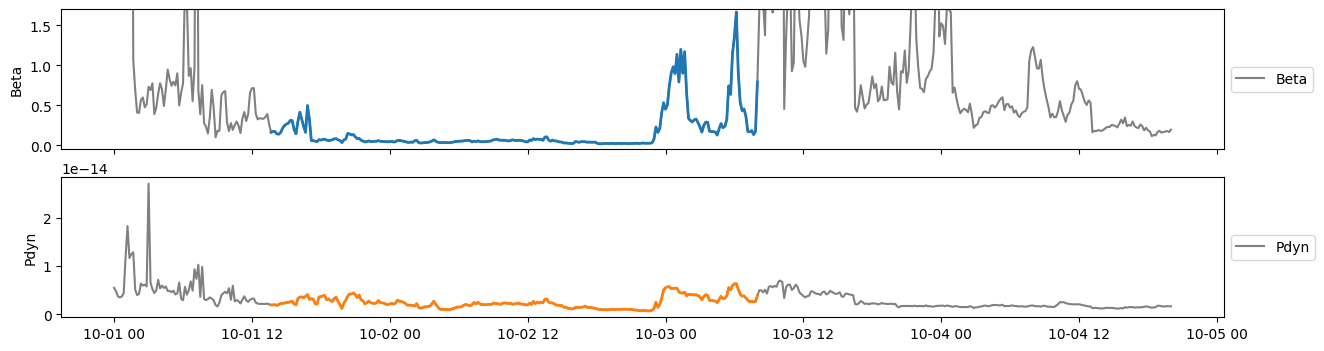

In [35]:
from problem import turn_prediction_to_event_list

events = turn_prediction_to_event_list(y_train)
def plot_event(event_index, data, features, maxRange=None, delta=36, size=4):
    global events

    start = pd.to_datetime(events[event_index].begin)
    end = pd.to_datetime(events[event_index].end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    area_of_interest = data[start:end]

    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(15,size), sharex=True)

    def plot(i, ax):
        ax.plot(subset.index, subset[features[i]], color='gray', linewidth=1.5)
        ax.plot(area_of_interest.index, area_of_interest[features[i]], color=f'C{i}', linewidth=2)
        ax.legend([features[i]], loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_ylabel(features[i])
        if maxRange is not None and i < len(maxRange):
            ax.set_ylim(maxRange[i][0], maxRange[i][1])

    if len(features) <= 1:
        plot(0, axes)
        return fig, axes

    i = 0
    for ax in axes:
        plot(i, ax)
        i += 1

    # add vertical lines
    for ax in axes:
        ax.xaxis.grid(True, which="minor")

    return fig, axes

plot_event(
    0,
    X_train,
    ['Beta', 'Pdyn'],
    maxRange=[[-0.05, 1.7]],
    size=4
)

(509834,) (509834,)


(<Figure size 1500x400 with 1 Axes>, <AxesSubplot: ylabel='Beta'>)

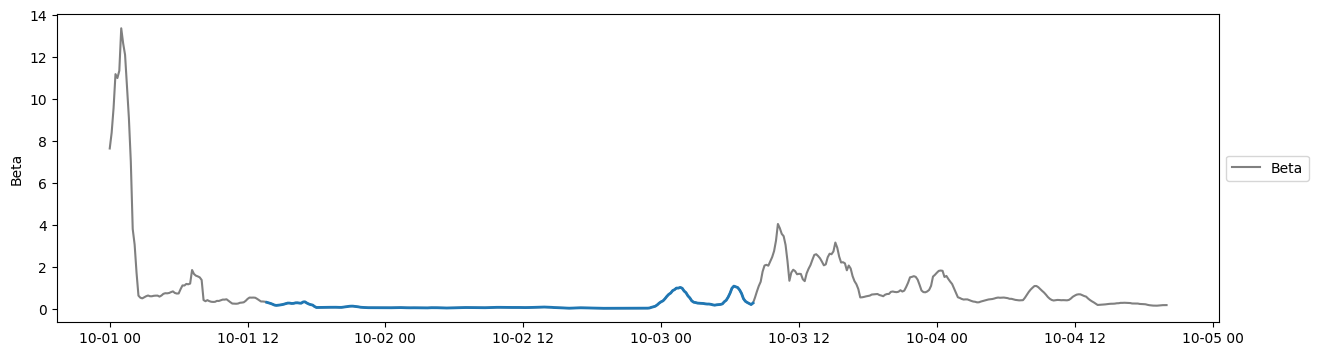

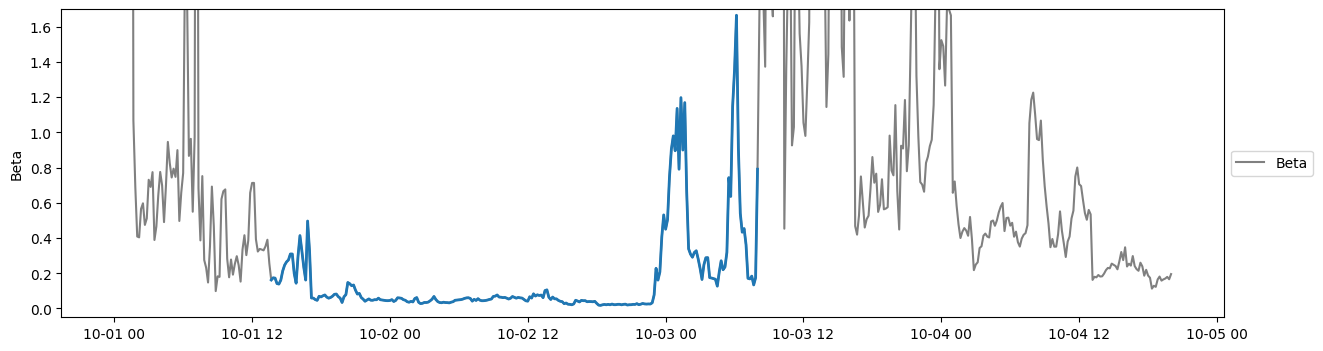

In [80]:
from scipy.interpolate import make_interp_spline

def denoise(X_df: pd.DataFrame, feature, threshold):
    fft_transform = np.fft.fft(X_df[feature].values)
    fft_transform[fft_transform > threshold] = 0
    denoised = np.fft.ifft(fft_transform)
    X_df[feature] = denoised
    return X_df

def smooth(X_df: pd.DataFrame, feature, time_window, center=False):
    X_df[feature] = X_df[feature].rolling(time_window, center=center).mean()
    return X_df

def interpolate(X_df: pd.DataFrame, feature, k=3):
    indexes = X_df.index.values.astype(float)
    values = X_df[feature].values
    print(indexes.shape, values.shape)
    bspl = make_interp_spline(indexes, values, k)
    X_df[feature] = bspl(values)
    return X_df

X_fft = X_train.copy(deep=True)
X_fft = denoise(X_fft, 'Beta', 5*10e3)

X_mean = X_train.copy(deep=True)
X_mean = smooth(X_mean, 'Beta', '1h')

X_interpolated = X_train.copy(deep=True)
X_interpolated = interpolate(X_interpolated, 'Beta', k=21)

plot_event(
    0,
    X_mean,
    ['Beta'],
    size=4
)

plot_event(
    0,
    X_train,
    ['Beta'],
    maxRange=[[-0.05, 1.7]],
    size=4
)

In [84]:
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline

def get_preprocessing():
    return preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=1).set_output(transform='pandas'), \
           preprocessing.RobustScaler().set_output(transform='pandas'), \
           preprocessing.MinMaxScaler().set_output(transform='pandas')

def pipeline_preprocessing(X):
    X_df = X.copy()
    pipe = make_pipeline(*get_preprocessing())
    pipe.fit(X_df)
    return pipe.transform(X_df)

In [85]:
X_train_preprocessed = pipeline_preprocessing(X_train)
X_classic_preprocessed, _, X_solarstorm_preprocessed, _ = get_solarstorms(X_train_preprocessed)
X_train_preprocessed.describe()

,B,Beta_2h_entropy,Vth_2h_energy,Beta_2h_energy,Vth_cwt_20,Beta_cwt_2,Beta_cwt_10,Beta_cwt_20,Vth_fft_real,Vth_fft_abs,...,Range F 9_10,Range F 9_20,Beta_30min_max_-1,Beta_30min_max_-5,Beta_30min_max_-10,Beta_30min_max_-20,Beta_30min_max_1,Beta_30min_max_5,Beta_30min_max_10,Beta_30min_max_20
count,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,...,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000
mean,0.499663,0.501163,0.499411,0.499237,0.499684,0.501689,0.499094,0.498943,0.499602,0.498107,...,0.498039,0.499403,0.500256,0.499340,0.497604,0.498909,0.500172,0.500541,0.498837,0.500687
std,0.094854,0.095705,0.094945,0.095871,0.094721,0.095103,0.094965,0.095414,0.094267,0.094975,...,0.099182,0.098938,0.094678,0.096042,0.094544,0.093949,0.095620,0.095965,0.094780,0.095539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.434698,0.437030,0.435409,0.433353,0.435450,0.437893,0.434416,0.433456,0.435392,0.432959,...,0.433909,0.435894,0.436493,0.434063,0.434220,0.436706,0.435849,0.435261,0.432784,0.436657
50%,0.500044,0.501186,0.499155,0.499882,0.499428,0.500698,0.498319,0.498968,0.500283,0.497874,...,0.499655,0.500889,0.501824,0.499855,0.497728,0.499804,0.500228,0.500453,0.500307,0.500354
75%,0.564575,0.565214,0.564037,0.565694,0.564552,0.566524,0.563683,0.564047,0.563266,0.561745,...,0.564448,0.565354,0.565005,0.565430,0.562368,0.562599,0.564971,0.565830,0.564145,0.565849
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
describe(X_train_preprocessed, ["B"])

In [ ]:
describe(X_solarstorm_preprocessed, columns=["B"])

(<Figure size 1500x600 with 3 Axes>,
 array([<AxesSubplot: ylabel='Beta'>, <AxesSubplot: ylabel='Pdyn'>,
        <AxesSubplot: ylabel='PMP_Ratio'>], dtype=object))

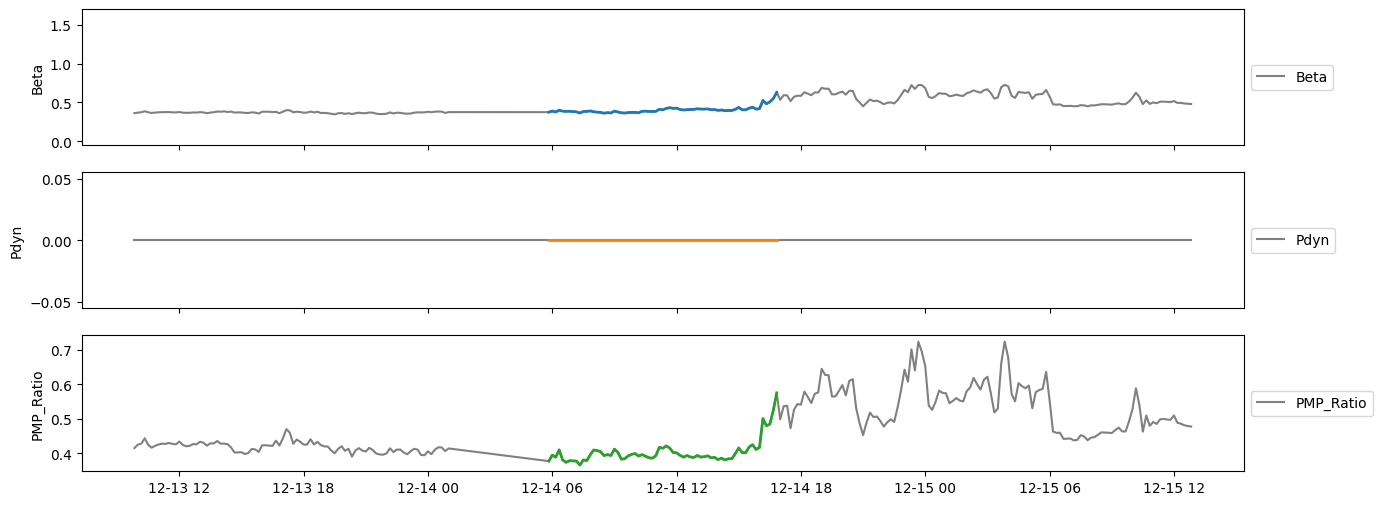

In [88]:
plot_event(
    10,
    X_train_preprocessed,
    ['Beta','Pdyn', 'PMP_Ratio'],
    maxRange=[[-0.05, 1.7]],
    size=6,
    delta=20,
)

# Feature engineering

In [8]:
fe = utils.FeatureExtractor()
X_transformed = fe.transform(X_train)
X_transformed.info()

               [*] Preprocessing data
               - Counting peaks and height
               - Rolling variance
               - Rolling min
               - Rolling max
               - FFT
               - CWT
               - Rolling quantile
               - Rolling energy
               - Rolling median
               - Rolling entropy
               - Time lags
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509834 entries, 1997-10-01 00:00:00 to 2007-12-31 23:50:00
Columns: 135 entries, B to Beta_30min_max_20
dtypes: float32(97), float64(38)
memory usage: 356.5 MB


C:\Users\frigi\Desktop\Code\DataCamp\DataCamp-Solar_Wind\test_environment\utils.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_df[name] = shifted
C:\Users\frigi\Desktop\Code\DataCamp\DataCamp-Solar_Wind\test_environment\utils.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_df[name] = shifted
C:\Users\frigi\Desktop\Code\DataCamp\DataCamp-Solar_Wind\test_environment\utils.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

In [9]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X_transformed, y_train)

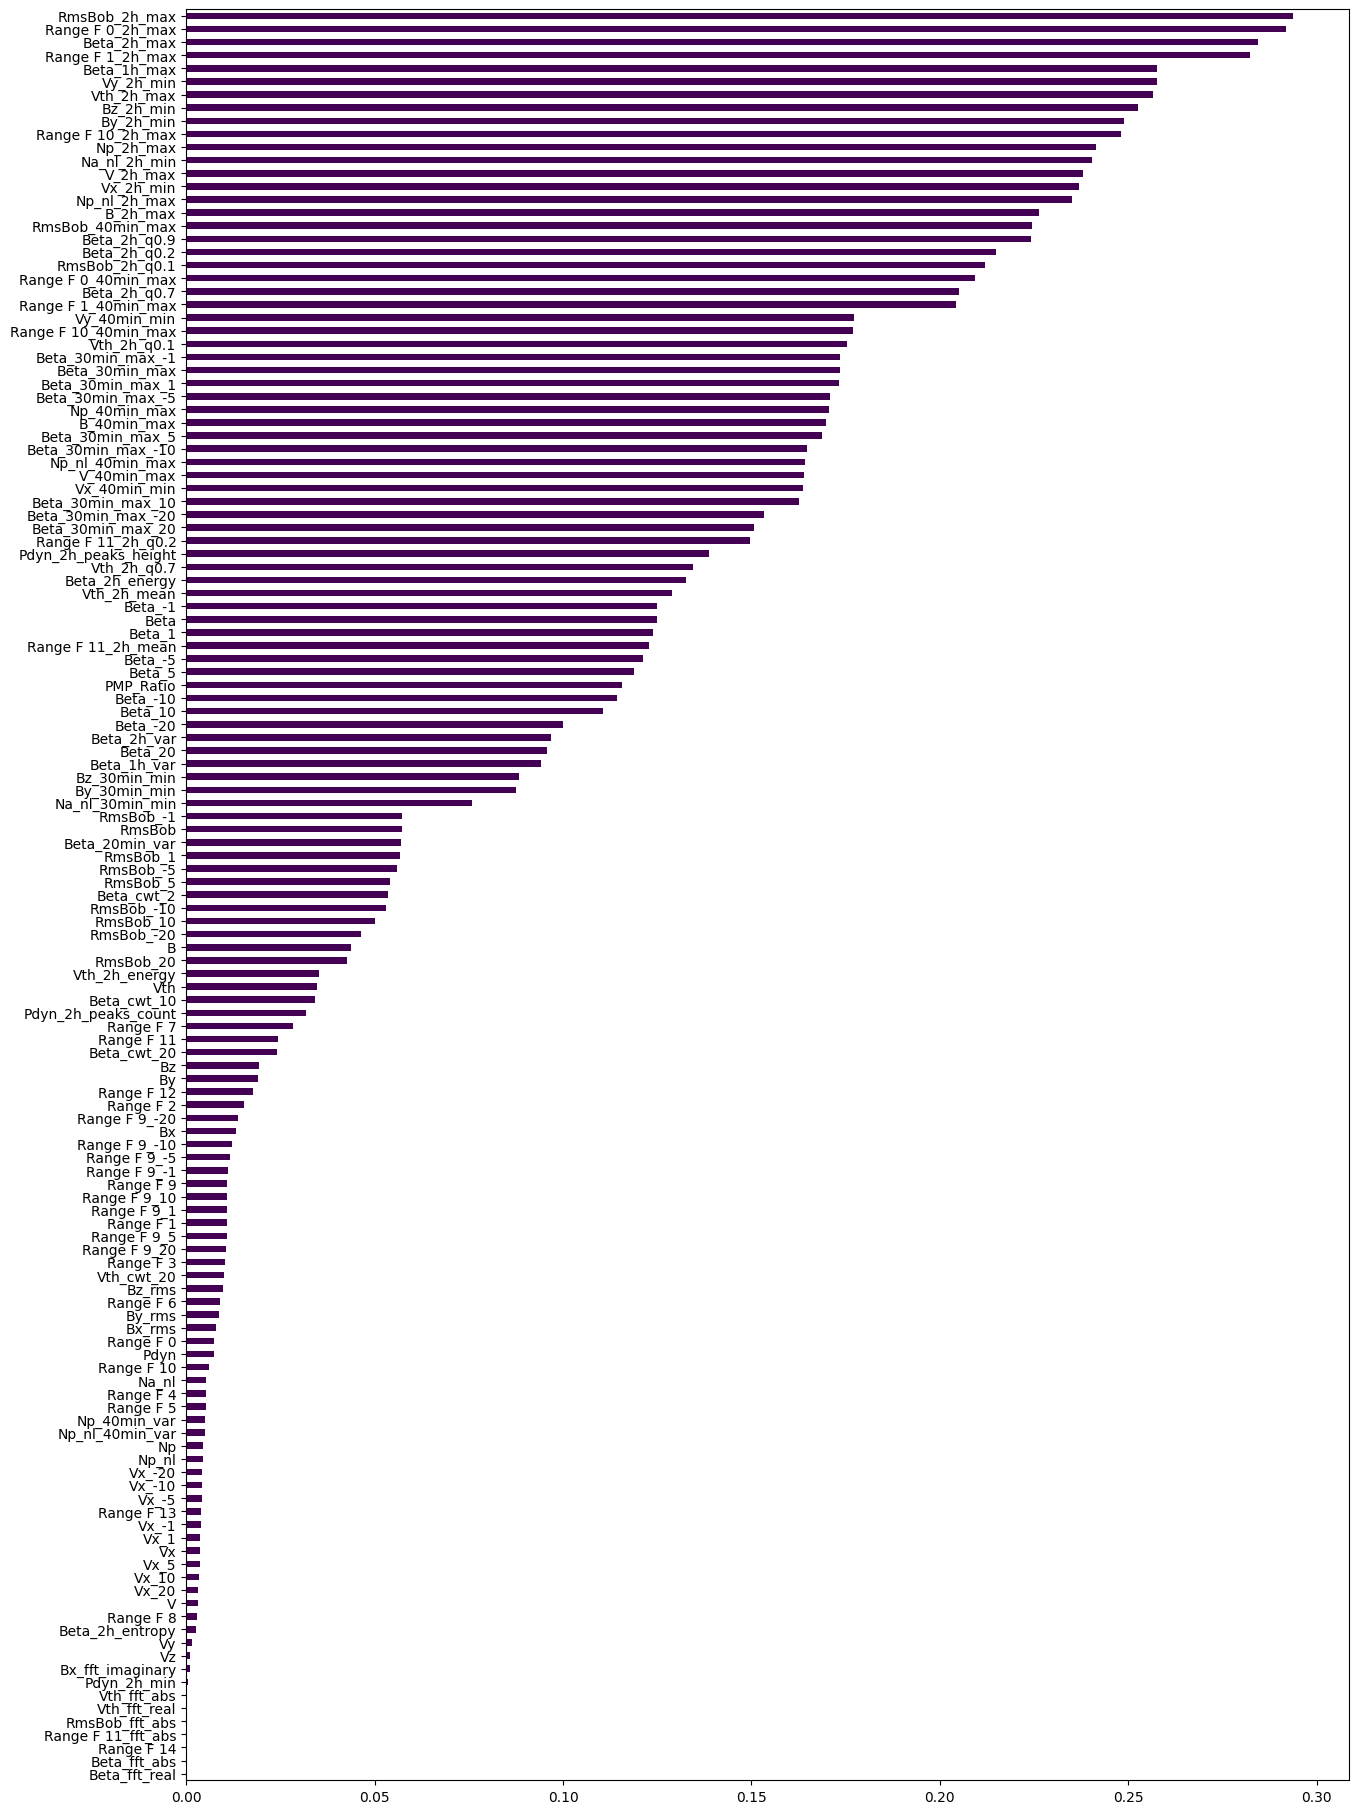

In [17]:
feat_importances = pd.Series(importances, X_transformed.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh', figsize=(15, 23), colormap='viridis')
plt.show()

In [34]:
print(feat_importances.index[-80:].to_list())

['Beta_cwt_20', 'Range F 11', 'Range F 7', 'Pdyn_2h_peaks_count', 'Beta_cwt_10', 'Vth', 'Vth_2h_energy', 'RmsBob_20', 'B', 'RmsBob_-20', 'RmsBob_10', 'RmsBob_-10', 'Beta_cwt_2', 'RmsBob_5', 'RmsBob_-5', 'RmsBob_1', 'Beta_20min_var', 'RmsBob', 'RmsBob_-1', 'Na_nl_30min_min', 'By_30min_min', 'Bz_30min_min', 'Beta_1h_var', 'Beta_20', 'Beta_2h_var', 'Beta_-20', 'Beta_10', 'Beta_-10', 'PMP_Ratio', 'Beta_5', 'Beta_-5', 'Range F 11_2h_mean', 'Beta_1', 'Beta', 'Beta_-1', 'Vth_2h_mean', 'Beta_2h_energy', 'Vth_2h_q0.7', 'Pdyn_2h_peaks_height', 'Range F 11_2h_q0.2', 'Beta_30min_max_20', 'Beta_30min_max_-20', 'Beta_30min_max_10', 'Vx_40min_min', 'V_40min_max', 'Np_nl_40min_max', 'Beta_30min_max_-10', 'Beta_30min_max_5', 'B_40min_max', 'Np_40min_max', 'Beta_30min_max_-5', 'Beta_30min_max_1', 'Beta_30min_max', 'Beta_30min_max_-1', 'Vth_2h_q0.1', 'Range F 10_40min_max', 'Vy_40min_min', 'Range F 1_40min_max', 'Beta_2h_q0.7', 'Range F 0_40min_max', 'RmsBob_2h_q0.1', 'Beta_2h_q0.2', 'Beta_2h_q0.9', 'Rms

In [11]:
X_classic_transformed, _, X_solarstorm_transformed, _ = get_solarstorms(X_transformed)

In [12]:
description_classic = X_classic_transformed.describe()
description_solarstorm = X_solarstorm_transformed.describe()

In [13]:
description_classic

,B,Vth_2h_energy,Beta_2h_energy,Vth_cwt_20,Beta_cwt_2,Beta_cwt_10,Beta_cwt_20,Vth_fft_real,Vth_fft_abs,RmsBob_fft_abs,...,Range F 9_10,Range F 9_20,Beta_30min_max_-1,Beta_30min_max_-5,Beta_30min_max_-10,Beta_30min_max_-20,Beta_30min_max_1,Beta_30min_max_5,Beta_30min_max_10,Beta_30min_max_20
count,451269.000000,4.512690e+05,4.512690e+05,451269.000000,451269.000000,451269.000000,451269.000000,4.512690e+05,4.512690e+05,451269.000000,...,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05
mean,6.267040,2.469252e+04,5.413163e+03,1.831450,0.002290,0.033405,0.086025,8.495767e+01,5.708985e+03,48.044449,...,2.408505e+09,2.406454e+09,1.166467e+00,1.164069e+00,1.160032e+00,1.148754e+00,1.165983e+00,1.162430e+00,1.158264e+00,1.150087e+00
std,6.699832,3.548794e+04,1.041353e+06,46.205700,21.226460,21.338907,21.428366,3.167900e+04,3.283204e+04,102.231506,...,2.393240e+09,2.387094e+09,3.673673e+01,3.673651e+01,3.673631e+01,3.673509e+01,3.673666e+01,3.673624e+01,3.673588e+01,3.673527e+01
min,0.265439,2.562922e+01,4.341866e-12,-571.169128,-3887.454602,-1739.728427,-1226.980703,-1.325182e+06,1.014206e+01,0.124947,...,0.000000e+00,0.000000e+00,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07
25%,4.136053,8.911351e+03,1.638548e+00,-15.935313,-0.171825,-0.616672,-0.984239,-1.928445e+03,2.048243e+03,24.441875,...,1.165286e+09,1.164246e+09,3.780306e-01,3.769752e-01,3.747559e-01,3.698196e-01,3.778784e-01,3.763788e-01,3.739453e-01,3.690578e-01
50%,5.428955,1.684817e+04,4.590734e+00,-0.982445,-0.020757,-0.082558,-0.128090,1.929642e+01,3.309597e+03,38.927834,...,1.920938e+09,1.920592e+09,6.539433e-01,6.527121e-01,6.506281e-01,6.457987e-01,6.537992e-01,6.522642e-01,6.502400e-01,6.458666e-01
75%,7.214952,3.067507e+04,1.220940e+01,15.789143,0.111739,0.436124,0.794840,1.962914e+03,5.210200e+03,58.183094,...,2.910268e+09,2.911014e+09,1.090200e+00,1.088712e+00,1.085466e+00,1.078999e+00,1.089966e+00,1.088134e+00,1.085023e+00,1.079475e+00
max,1419.378296,2.077230e+06,2.019438e+08,1270.100708,7918.848009,3881.422068,2751.149114,2.014620e+07,2.014620e+07,60134.953125,...,7.634294e+10,7.634294e+10,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04


In [14]:
description_solarstorm

,B,Vth_2h_energy,Beta_2h_energy,Vth_cwt_20,Beta_cwt_2,Beta_cwt_10,Beta_cwt_20,Vth_fft_real,Vth_fft_abs,RmsBob_fft_abs,...,Range F 9_10,Range F 9_20,Beta_30min_max_-1,Beta_30min_max_-5,Beta_30min_max_-10,Beta_30min_max_-20,Beta_30min_max_1,Beta_30min_max_5,Beta_30min_max_10,Beta_30min_max_20
count,58565.000000,58565.000000,5.856500e+04,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,...,5.856500e+04,5.856500e+04,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000
mean,9.324401,12283.461914,1.075073e+01,-13.903497,-0.016922,-0.254026,-0.657940,47.136326,5177.539551,46.028755,...,3.176779e+09,3.192373e+09,0.240392,0.259415,0.291213,0.379514,0.243842,0.270264,0.301135,0.364079
std,4.869545,16101.686523,5.402963e+02,43.333828,0.909229,1.388221,1.929436,10673.098633,13861.922852,51.759113,...,3.065929e+09,3.098878e+09,1.514710,1.569195,1.623510,1.865599,1.530229,1.617192,1.688037,1.816179
min,1.033130,438.895996,1.040475e-07,-356.270477,-53.136498,-23.964835,-20.513382,-444853.187500,10.142059,0.439396,...,0.000000e+00,0.000000e+00,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032
25%,6.239811,4430.412598,3.804597e-02,-30.766712,-0.036994,-0.336414,-0.987381,-1798.674316,1948.863403,23.833496,...,1.287915e+09,1.298415e+09,0.055525,0.055847,0.056892,0.059193,0.055529,0.056457,0.057789,0.060282
50%,8.273197,7235.054688,1.792060e-01,-10.608675,-0.004153,-0.066276,-0.286998,28.654226,3136.426514,37.533226,...,2.333521e+09,2.329286e+09,0.121705,0.123371,0.127328,0.137263,0.121988,0.124975,0.129788,0.140995
75%,10.933852,13572.250000,6.699113e-01,4.775337,0.015442,0.027807,-0.003180,1851.394653,4805.071289,55.345516,...,4.054267e+09,4.039729e+09,0.246534,0.251702,0.264787,0.302453,0.247614,0.257410,0.273641,0.310349
max,56.476120,343877.500000,3.767784e+04,363.143250,108.094189,53.095094,37.100341,390312.218750,500264.062500,1699.319458,...,5.227946e+10,5.053815e+10,194.106675,194.106675,194.106675,194.106675,194.106675,194.106675,194.106675,194.106675


In [15]:
variations = description_classic.to_numpy().astype(np.float32) - description_solarstorm.to_numpy().astype(np.float32)
variations = pd.DataFrame(columns=description_solarstorm.columns, index=description_solarstorm.index, data=variations)
variations

,B,Vth_2h_energy,Beta_2h_energy,Vth_cwt_20,Beta_cwt_2,Beta_cwt_10,Beta_cwt_20,Vth_fft_real,Vth_fft_abs,RmsBob_fft_abs,...,Range F 9_10,Range F 9_20,Beta_30min_max_-1,Beta_30min_max_-5,Beta_30min_max_-10,Beta_30min_max_-20,Beta_30min_max_1,Beta_30min_max_5,Beta_30min_max_10,Beta_30min_max_20
count,392704.000000,3.927040e+05,3.927040e+05,392704.000000,392704.000000,392704.000000,392704.000000,3.927040e+05,3.927040e+05,392704.000000,...,3.927040e+05,3.927040e+05,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000
mean,-3.057361,1.240906e+04,5.402412e+03,15.734946,0.019211,0.287431,0.743965,3.782135e+01,5.314453e+02,2.015694,...,-7.682739e+08,-7.859185e+08,0.926075,0.904654,0.868818,0.769240,0.922141,0.892165,0.857129,0.786008
std,1.830287,1.938625e+04,1.040813e+06,2.871872,20.317230,19.950687,19.498930,2.100590e+04,1.897011e+04,50.472393,...,-6.726892e+08,-7.117834e+08,35.222023,35.167313,35.112801,34.869492,35.206429,35.119045,35.047844,34.919094
min,-0.767691,-4.132668e+02,-1.040432e-07,-214.898651,-3834.318115,-1715.763550,-1206.467285,-8.803284e+05,0.000000e+00,-0.314449,...,0.000000e+00,0.000000e+00,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032
25%,-2.103758,4.480938e+03,1.600502e+00,14.831399,-0.134831,-0.280258,0.003142,-1.297711e+02,9.937952e+01,0.608379,...,-1.226290e+08,-1.341690e+08,0.322505,0.321128,0.317864,0.310627,0.322349,0.319922,0.316157,0.308775
50%,-2.844242,9.613119e+03,4.411528e+00,9.626230,-0.016605,-0.016283,0.158908,-9.357809e+00,1.731707e+02,1.394608,...,-4.125832e+08,-4.086938e+08,0.532239,0.529342,0.523301,0.508535,0.531811,0.527289,0.520452,0.504871
75%,-3.718900,1.710282e+04,1.153948e+01,11.013805,0.096297,0.408317,0.798020,1.115192e+02,4.051289e+02,2.837578,...,-1.143999e+09,-1.128715e+09,0.843665,0.837011,0.820679,0.776547,0.842353,0.830724,0.811382,0.769126
max,1362.902222,1.733352e+06,2.019061e+08,906.957458,7810.753906,3828.327148,2714.048828,1.975589e+07,1.964594e+07,58435.632812,...,2.406348e+10,2.580480e+10,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961


In [ ]:
import tspymfe.tsmfe as tsmfe

extractor = tsmfe.TSMFE()
extractor.fit(X_transformed["Beta"].to_numpy()[:10000])
res = extractor.extract()

# Training classifier

## Memory Classifier

In [ ]:
from markov_model import MemoryClassifier
from sklearn.ensemble import RandomForestClassifier

memory = 12
characteristic_storm_duration = 50
model = MemoryClassifier(
        memory=memory,
        classifier=RandomForestClassifier(n_estimators=50, max_depth=9, class_weight={0: 1, 1: 1.5}),
        characteristic_storm_duration=50,
    )

model.fit(X_transformed, y_train)

In [ ]:
classifier = model.classifier
features = pd.DataFrame(index=list(X_transformed.keys()) + [f"y_-{t}" for t in range(1, memory+1)], data=classifier.feature_importances_, columns=["importance"])
features.sort_values(by='importance', ascending=False)

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, class_weight='balanced')
model.fit(X_transformed, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50)

In [17]:
features = pd.DataFrame(index=list(X_transformed.keys()), data=model.feature_importances_, columns=["importance"])
features.sort_values(by='importance', ascending=False)

,importance
Beta_2h_q0.2,0.076313
Beta_2h_q0.7,0.064179
Beta_30min_max_1,0.059791
Beta_2h_q0.9,0.037635
Beta_30min_max_5,0.024790
...,...
Pdyn_2h_peaks_count,0.000713
Range F 14,0.000000
Pdyn_2h_min,0.000000
Pdyn_2h_peaks_height,0.000000


In [ ]:
X_solarstorm.shape[0]/X_train.shape[0]